<a href="https://colab.research.google.com/github/Ninanwt/Project-Analisis-Sentimen-Aplikasi/blob/main/Project_Analisis_Sentimen_Aplikasi_KitaLulus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Analisis Sentimen Ulasan Aplikasi KitaLulus Di Google Play Store Menggunakan Algoritma Naive Bayes <b>

<b>Install Library google-play-scarapper

In [ ]:
!pip install google-play-scraper

<b> Import Modul-Modul yang diperlukan


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

<b> Scrape Jumlah Ulasan yang diinginkan

In [ ]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
    'com.kitalulus',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi kitalulus yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, #kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None #kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

<b> Menampilkan Kolom Reviewnya

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9bdde0a6-97e9-4dee-8433-371239491b21,Ardi ansyah,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini sangat membantu untuk mencari pek...,5,19,2.56.0,2024-05-29 04:57:42,Terima kasih atas dukungan kakak. KitaLulus te...,2024-05-29 05:49:06,2.56.0
1,9f909350-9f85-4d96-aa09-47bfe1c6a049,Adissa ayyu,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya sangat membantu dalam mencari peke...,5,32,2.56.0,2024-05-27 06:24:12,Terima kasih atas dukungan kakak. KitaLulus te...,2024-05-27 06:52:36,2.56.0
2,bca7243f-a58f-459c-83dd-4bdd1122f976,Yolanda Priliyana,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi yang sangat membantu dan mempermudah ...,5,59,2.55.0,2024-05-14 05:27:21,KitaLulus terpilih sebagai Google Play Best Ap...,2024-05-14 10:34:44,2.55.0
3,bb3e5c48-b306-4275-a119-0d781f457949,Iin Kamini,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya sangat membantu dalam mencari peke...,5,62,2.52.1,2024-03-27 12:56:09,KitaLulus terpilih sebagai Google Play Best Ap...,2024-03-27 13:17:53,2.52.1
4,0f3cf247-2e21-4e56-bbb0-8bbdfe6f61a9,Nurul Aulia,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi paling terbaik di antara aplikasi2 pe...,5,16,2.54.0,2024-05-07 13:59:38,KitaLulus terpilih sebagai Google Play Best Ap...,2024-05-08 03:33:21,2.54.0


<b> Menghitung Kembali Jumlah Data yang didapatkan

In [ ]:
len(df_busu.index)

597

<b> Dari Kolom yang Sudah didapat, Lakukan Filtering hingga didapat Kolom Username, Score, at, dan Content.

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Ardi ansyah,5,2024-05-29 04:57:42,Aplikasi ini sangat membantu untuk mencari pek...
1,Adissa ayyu,5,2024-05-27 06:24:12,Aplikasinya sangat membantu dalam mencari peke...
2,Yolanda Priliyana,5,2024-05-14 05:27:21,Aplikasi yang sangat membantu dan mempermudah ...
3,Iin Kamini,5,2024-03-27 12:56:09,Aplikasinya sangat membantu dalam mencari peke...
4,Nurul Aulia,5,2024-05-07 13:59:38,Aplikasi paling terbaik di antara aplikasi2 pe...


<b> Menyortir berdasarkan urutan yang terlama

In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort berdasarkan urutan terlama
sorted_df.head()

,userName,score,at,content
439,raphenee,5,2024-06-03 06:27:05,terimakasih masalahnya sudah teratasi
171,Erna Puspa Sari,5,2024-06-02 10:26:51,Kemarin aku download aplikasi ini buat nyari k...
444,Herdi Ansyah,2,2024-06-02 05:15:41,Heran. Mau ngelamar kerja malah dapet error mulu
401,Zatya Kasih,5,2024-06-02 02:23:26,hallo kak sebelumny ak mau kenalin diri dlu ni...
83,Muhammad Rayhan Ramadhani,2,2024-06-01 12:04:56,"Ada opsi buat CV, tetapi tidak bisa di klik be..."


<b> Menyimpan dalam variabel my_df

In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]

<b> Filtering hingga didapat kolom content dan score

In [ ]:
my_df=my_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score
#maka kita lakukan filtering kolom lagi hingga menyisakan kolom content dan score.

In [ ]:
my_df.head() #Menampilkan kolom

,content,score
439,terimakasih masalahnya sudah teratasi,5
171,Kemarin aku download aplikasi ini buat nyari k...,5
444,Heran. Mau ngelamar kerja malah dapet error mulu,2
401,hallo kak sebelumny ak mau kenalin diri dlu ni...,5
83,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2


<b> Melakukan Pelabelan (menggunakan metode if elif)

In [ ]:
def pelabelan(score):
  if score < 3:  #tidak menggunakan score 3, karena ambigu ada yang memberikan score 3 namun content negatif dan ada yang positif.
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
439,terimakasih masalahnya sudah teratasi,5,Positif
171,Kemarin aku download aplikasi ini buat nyari k...,5,Positif
444,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif
401,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif
83,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif
140,aplikasi ini bagus dan smahat membantu kita un...,5,Positif
27,Cape cape ngisi data diri tapi ga bisa di save...,1,Negatif
443,Baguss buat yang nyari pekerjaan mah,5,Positif
21,Tolong jangan ada notifikasi paksa buat ngleng...,2,Negatif
412,sangat membantu untuk mencari info loker yang ...,5,Positif


<b> Menyimpan hasil scrapping tadi menjadi file csv dengan nama "scrapped_data.csv"

In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)

<b> Pembersihan data (Data Cleaning)

In [ ]:
import pandas as pd #import modul pandas
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv') #bersihkan data dengan file tadi
my_df.head(50)

,content,score,Label
0,terimakasih masalahnya sudah teratasi,5,Positif
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif
5,aplikasi ini bagus dan smahat membantu kita un...,5,Positif
6,Cape cape ngisi data diri tapi ga bisa di save...,1,Negatif
7,Baguss buat yang nyari pekerjaan mah,5,Positif
8,Tolong jangan ada notifikasi paksa buat ngleng...,2,Negatif
9,sangat membantu untuk mencari info loker yang ...,5,Positif


<b> Menampilkan informasi tentang dataframe-nya

In [ ]:
#info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  597 non-null    object
 1   score    597 non-null    int64 
 2   Label    574 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.1+ KB


In [ ]:
#menampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun, dan
#menggunakan fitur isna() yang disediakan library pandas.
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
592,False,False,False
593,False,False,True
594,False,False,False
595,False,False,False


In [ ]:
my_df.isna().any() #informasi label

content    False
score      False
Label       True
dtype: bool

In [ ]:
my_df.describe() #informasi deskripsi

,score
count,597.000000
mean,4.536013
std,1.128100
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


<b> Mencari jumlah baris data yang bernilai null

In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

content     0
score       0
Label      23
dtype: int64

<b> Handling missing value-ignore tuple (membersihkan nilai null tersebut)

In [ ]:
my_df.dropna(subset=['Label'],inplace = True) #karena kolom label yg dibersihkan jd tulis subset=label

In [ ]:
my_df.isnull().sum() #melihat jumlah null pada kolom label

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.head(50) #menampilkan kolom

,content,score,Label
0,terimakasih masalahnya sudah teratasi,5,Positif
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif
5,aplikasi ini bagus dan smahat membantu kita un...,5,Positif
6,Cape cape ngisi data diri tapi ga bisa di save...,1,Negatif
7,Baguss buat yang nyari pekerjaan mah,5,Positif
8,Tolong jangan ada notifikasi paksa buat ngleng...,2,Negatif
9,sangat membantu untuk mencari info loker yang ...,5,Positif


In [ ]:
my_df.to_csv("kitaluluspreprocessing.csv", index = False)
#simpan hasil file data cleaning dengan nama kitaluluspreprocessing.csv

<b> Text Pre Processing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/kitaluluspreprocessing.csv')
df.head(50)

,content,score,Label
0,terimakasih masalahnya sudah teratasi,5,Positif
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif
5,aplikasi ini bagus dan smahat membantu kita un...,5,Positif
6,Cape cape ngisi data diri tapi ga bisa di save...,1,Negatif
7,Baguss buat yang nyari pekerjaan mah,5,Positif
8,Tolong jangan ada notifikasi paksa buat ngleng...,2,Negatif
9,sangat membantu untuk mencari info loker yang ...,5,Positif


<b> 1) Case Folding

Case folding adalah proses mengubah seluruh huruf menjadi huruf kecil.Contoh: karakter 'A'-'Z' akan diubah kedalam karakter 'a'-'z'


In [ ]:
import re  #menggunakan modul re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,terimakasih masalahnya sudah teratasi,5,Positif,terimakasih masalahnya sudah teratasi
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif,kemarin aku download aplikasi ini buat nyari k...
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif,heran mau ngelamar kerja malah dapet error mulu
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif,hallo kak sebelumny ak mau kenalin diri dlu ni...
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif,ada opsi buat cv tetapi tidak bisa di klik ber...
5,aplikasi ini bagus dan smahat membantu kita un...,5,Positif,aplikasi ini bagus dan smahat membantu kita un...
6,Cape cape ngisi data diri tapi ga bisa di save...,1,Negatif,cape cape ngisi data diri tapi ga bisa di save...
7,Baguss buat yang nyari pekerjaan mah,5,Positif,baguss buat yang nyari pekerjaan mah
8,Tolong jangan ada notifikasi paksa buat ngleng...,2,Negatif,tolong jangan ada notifikasi paksa buat ngleng...
9,sangat membantu untuk mencari info loker yang ...,5,Positif,sangat membantu untuk mencari info loker yang ...


<b> Stopword Removal

Stopword adalah kata-kata umum yang sering muncul dan dianggap tidak memiliki makna yang signifikan. Contoh stopword dalam bahasa Indonesia meliputi "yang", "dan", "di", "dari", dan lain sebagainya. Penggunaan stopword bertujuan untuk menghilangkan kata-kata dengan informasi rendah dari teks, sehingga kita dapat fokus pada kata-kata yang lebih penting.

In [ ]:
import nltk.corpus #import modul nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(199)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,terimakasih masalahnya sudah teratasi,5,Positif,terimakasih masalahnya sudah teratasi,terimakasih teratasi
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif,kemarin aku download aplikasi ini buat nyari k...,kemarin download aplikasi nyari kerja alhamdul...
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif,heran mau ngelamar kerja malah dapet error mulu,heran ngelamar kerja dapet error mulu
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif,hallo kak sebelumny ak mau kenalin diri dlu ni...,hallo kak sebelumny ak kenalin dlu ni nma kia ...
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif,ada opsi buat cv tetapi tidak bisa di klik ber...,opsi cv klik bertuliskan kendala mohon diperba...
...,...,...,...,...,...
200,Memudahkan dalam melamar kerja. Aplikasi easy ...,5,Positif,memudahkan dalam melamar kerja aplikasi easy t...,memudahkan melamar kerja aplikasi easy to use ...
201,"aplikasinya sangat bagu, memudahkan kita untuk...",5,Positif,aplikasinya sangat bagu memudahkan kita untuk ...,aplikasinya bagu memudahkan mencari pekerjaan ...
202,Bisa2 nya ada aplikasi yang sangat membantu. S...,5,Positif,bisa nya ada aplikasi yang sangat membantu sem...,nya aplikasi membantu semoga menebar manfaat
203,"Aplikasi nya bagus, mudah digunakan (user frie...",5,Positif,aplikasi nya bagus mudah digunakan user friend...,aplikasi nya bagus mudah user friendly stafnya...


<b> Proses Tokenizing

Tokenizing adalah langkah dalam membagi teks menjadi unit-unit kecil yang disebut sebagai token, yang kemudian dapat dianalisis lebih lanjut. Token dapat berupa kata, angka, simbol, tanda baca, dan entitas penting lainnya.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,terimakasih masalahnya sudah teratasi,5,Positif,terimakasih masalahnya sudah teratasi,terimakasih teratasi,"[terimakasih, teratasi]",terimakasih atas
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif,kemarin aku download aplikasi ini buat nyari k...,kemarin download aplikasi nyari kerja alhamdul...,"[kemarin, download, aplikasi, nyari, kerja, al...",kemarin download aplikasi nyari kerja alhamdul...
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif,heran mau ngelamar kerja malah dapet error mulu,heran ngelamar kerja dapet error mulu,"[heran, ngelamar, kerja, dapet, error, mulu]",heran ngelamar kerja dapet error mulu
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif,hallo kak sebelumny ak mau kenalin diri dlu ni...,hallo kak sebelumny ak kenalin dlu ni nma kia ...,"[hallo, kak, sebelumny, ak, kenalin, dlu, ni, ...",hallo kak sebelumny ak kenalin dlu ni nma kia ...
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif,ada opsi buat cv tetapi tidak bisa di klik ber...,opsi cv klik bertuliskan kendala mohon diperba...,"[opsi, cv, klik, bertuliskan, kendala, mohon, ...",opsi cv klik tulis kendala mohon baik terima k...


<b> Proses Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi #menginstall modul sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

1732
------------------------
1 : terimakasih : terimakasih
2 : teratasi : atas
3 : kemarin : kemarin
4 : download : download
5 : aplikasi : aplikasi
6 : nyari : nyari
7 : kerja : kerja
8 : alhamdulillah : alhamdulillah
9 : skrg : skrg
10 : udah : udah
11 : pokoknya : pokok
12 : puas : puas
13 : banget : banget
14 : deh : deh
15 : heran : heran
16 : ngelamar : ngelamar
17 : dapet : dapet
18 : error : error
19 : mulu : mulu
20 : hallo : hallo
21 : kak : kak
22 : sebelumny : sebelumny
23 : ak : ak
24 : kenalin : kenalin
25 : dlu : dlu
26 : ni : ni
27 : nma : nma
28 : kia : kia
29 : dn : dn
30 : msih : msih
31 : smphappy : smphappy
32 : bangt : bangt
33 : pas : pas
34 : ketemu : ketemu
35 : bnr : bnr
36 : membantu : bantu
37 : yg : yg
38 : nambah : nambah
39 : uang : uang
40 : jajan : jajan
41 : sklhawalny : sklhawalny
42 : gk : gk
43 : percaya : percaya
44 : sm : sm
45 : ginian : ginian
46 : tp : tp
47 : stelah : stelah
48 : tau : tau
49 : frelance : frelance
50 : benerannmakasihh : bene

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,terimakasih masalahnya sudah teratasi,5,Positif,terimakasih masalahnya sudah teratasi,terimakasih teratasi,"[terimakasih, teratasi]",terimakasih atas
1,Kemarin aku download aplikasi ini buat nyari k...,5,Positif,kemarin aku download aplikasi ini buat nyari k...,kemarin download aplikasi nyari kerja alhamdul...,"[kemarin, download, aplikasi, nyari, kerja, al...",kemarin download aplikasi nyari kerja alhamdul...
2,Heran. Mau ngelamar kerja malah dapet error mulu,2,Negatif,heran mau ngelamar kerja malah dapet error mulu,heran ngelamar kerja dapet error mulu,"[heran, ngelamar, kerja, dapet, error, mulu]",heran ngelamar kerja dapet error mulu
3,hallo kak sebelumny ak mau kenalin diri dlu ni...,5,Positif,hallo kak sebelumny ak mau kenalin diri dlu ni...,hallo kak sebelumny ak kenalin dlu ni nma kia ...,"[hallo, kak, sebelumny, ak, kenalin, dlu, ni, ...",hallo kak sebelumny ak kenalin dlu ni nma kia ...
4,"Ada opsi buat CV, tetapi tidak bisa di klik be...",2,Negatif,ada opsi buat cv tetapi tidak bisa di klik ber...,opsi cv klik bertuliskan kendala mohon diperba...,"[opsi, cv, klik, bertuliskan, kendala, mohon, ...",opsi cv klik tulis kendala mohon baik terima k...
5,aplikasi ini bagus dan smahat membantu kita un...,5,Positif,aplikasi ini bagus dan smahat membantu kita un...,aplikasi bagus smahat membantu mencari pekerja...,"[aplikasi, bagus, smahat, membantu, mencari, p...",aplikasi bagus smahat bantu cari kerja part ti...
6,Cape cape ngisi data diri tapi ga bisa di save...,1,Negatif,cape cape ngisi data diri tapi ga bisa di save...,cape cape ngisi data ga save heran udah diisi ...,"[cape, cape, ngisi, data, ga, save, heran, uda...",cape cape ngisi data ga save heran udah isi sa...
7,Baguss buat yang nyari pekerjaan mah,5,Positif,baguss buat yang nyari pekerjaan mah,baguss nyari pekerjaan mah,"[baguss, nyari, pekerjaan, mah]",baguss nyari kerja mah
8,Tolong jangan ada notifikasi paksa buat ngleng...,2,Negatif,tolong jangan ada notifikasi paksa buat ngleng...,tolong notifikasi paksa nglengkapin data enak ...,"[tolong, notifikasi, paksa, nglengkapin, data,...",tolong notifikasi paksa nglengkapin data enak ...
9,sangat membantu untuk mencari info loker yang ...,5,Positif,sangat membantu untuk mencari info loker yang ...,membantu mencari info loker tersedia semoga jo...,"[membantu, mencari, info, loker, tersedia, sem...",bantu cari info loker sedia moga job freleance...


<b> Menyimpam hasil text pre processing ke dalam file csv

In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_kitalulus.csv', index= False) #simpan hasil text preprocessing ke file csv

In [ ]:
#Mengimport library re, kemudian kita lakukan pra proses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

<b> ALGORITMA NAIVE BAYES

Spliting Data (memecah data tes 20% dari keseluruhan data).

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

<b> Pembobotan TF-IDF

Pembobotan data latih pada TF=IDF menggunakan library sklearn dengan menggunakan modul TfIdfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
#pada sintax ini xtran dan xtest adalah variabel yang berisi data text latih.
#masing-masing tfidfvectorizer akan menghitung nilai tfidf dari masing-masing kata.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(459,)
(459,)
(115,)
(115,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
#untuk mengimport hasil akurasi score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

Evaluasi performa model dengan menggunakan beberapa matriks seperti akurasi, precission, recall, dan f1_score.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_kitalulus.csv')

MultinomialNB Accuracy: 0.8869565217391304
MultinomialNB Precision: 0.8
MultinomialNB Recall: 0.42105263157894735
MultinomialNB f1_score: 0.5517241379310345
confusion_matrix:
 [[ 8 11]
 [ 2 94]]

              precision    recall  f1-score   support

     Negatif       0.80      0.42      0.55        19
     Positif       0.90      0.98      0.94        96

    accuracy                           0.89       115
   macro avg       0.85      0.70      0.74       115
weighted avg       0.88      0.89      0.87       115



<h3><b> PROSES VISUALISASI DATA

<b> 1. Exploratory Data Analisis (EDA), visualisasi ini berfungsi untuk mengetahui seberapa banyak orang yang memberikan rating pada aplikasi kitaLulus.

In [ ]:
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['score']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['score']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['score']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['score']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['score']==5.0])} rows")

Input data has 574 rows and 3 columns
rating 1.0 = 39 rows
rating 2.0 = 16 rows
rating 3.0 = 0 rows
rating 4.0 = 27 rows
rating 5.0 = 492 rows


<b> 2. Menampilkan diagram batang (menggunakan modul seaborn)

In [ ]:
!pip install seaborn

Number of negative ratings: 55
Number of positive ratings: 519


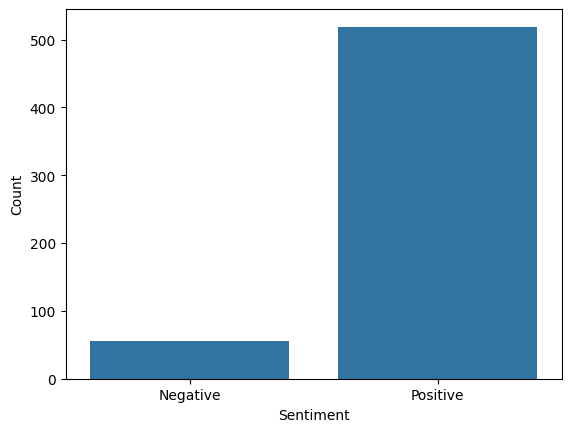

In [ ]:
import seaborn as sns

# Menghitung jumlah nilai negatif (rating < 3) dan positif (rating 4-5)
negative_count = (df['score'] < 3).sum()
positive_count = ((df['score'] == 4) | (df['score'] == 5)).sum()

# Menampilkan jumlah nilai negatif dan positif
print(f"Number of negative ratings: {negative_count}")
print(f"Number of positive ratings: {positive_count}")

# Membuat DataFrame baru untuk digunakan dalam countplot
data = pd.DataFrame({'Sentiment': ['Negative', 'Positive'], 'Count': [negative_count, positive_count]})

# Membuat countplot dengan sumbu x yang menampilkan jumlah nilai negatif dan positif
sns.barplot(x='Sentiment', y='Count', data=data);

Number of null in label: 0
Number of null in text: 0


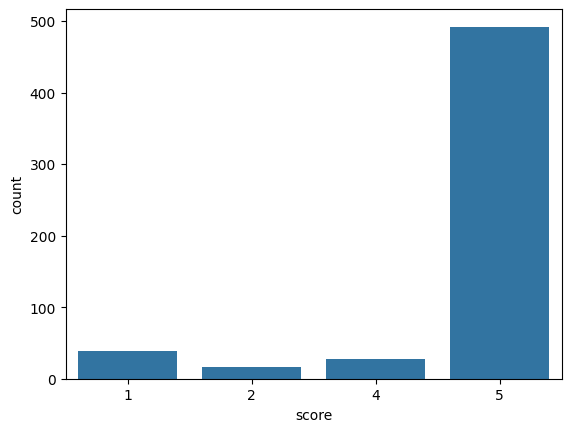

In [ ]:
import seaborn as sns
print(f"Number of null in label: { df['score'].isnull().sum()}")
print(f"Number of null in text: { df['score'].isnull().sum()}")
sns.countplot(x='score', data=df);

<b> 3. Wordcloud, berfungsi untuk mengetahui seberapa banyak kata yang terdapat pada ulasan yang bersifat positif maupun negatif.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter reviews by score
df_negative = df[(df['score'] == 1.0) | (df['score'] == 2.0)]
df_positive = df[(df['score'] == 4.0) | (df['score'] == 5.0)]

# Convert reviews to list
negative_list = df_negative['content'].tolist()
positive_list = df_positive['content'].tolist()

# Join lists into single strings
filtered_negative = " ".join(negative_list).lower()
filtered_positive = " ".join(positive_list).lower()

# Daftar stopwords bahasa Indonesia
stopwords = set(STOPWORDS)
stopwords.update([
    "di", "yang", "dan", "dari", "ke", "untuk", "dengan", "pada", "adalah",
    "ini", "itu", "saya", "kita", "akan", "tersebut", "bahwa", "atau", "dalam",
    "karena", "juga", "sebagai", "tidak", "pada", "dapat", "oleh", "kami", "anda",
    "namun", "bagi", "agar", "terhadap", "lebih", "ia", "mereka", "bisa", "dari",
    "ini", "adalah", "ada", "sudah", "saat", "untuk", "tetapi", "seperti", "akan",
    "jadi", "setelah", "saat", "itu", "yang", "lagi", "maka", "apabila", "tapi", "padahal"
])

<b> Review Positif

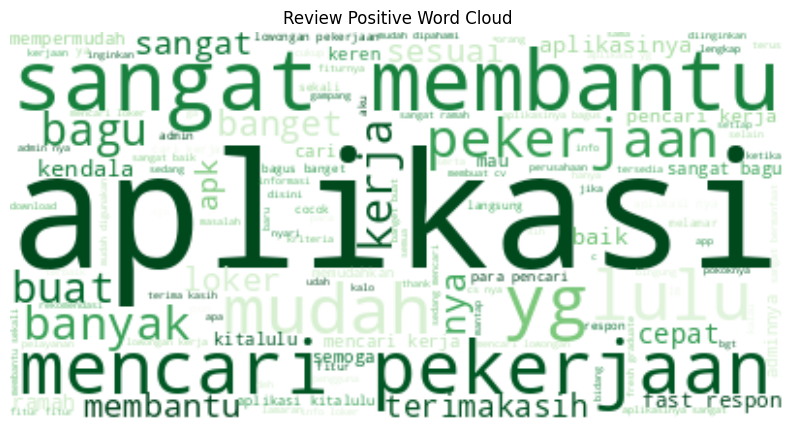

In [ ]:
# Generate and display word cloud for positive reviews
wordcloud_positive = WordCloud(stopwords=stopwords, max_font_size=100, margin=0, background_color="white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Review Positive Word Cloud")
plt.show()


<b> Review Negatif

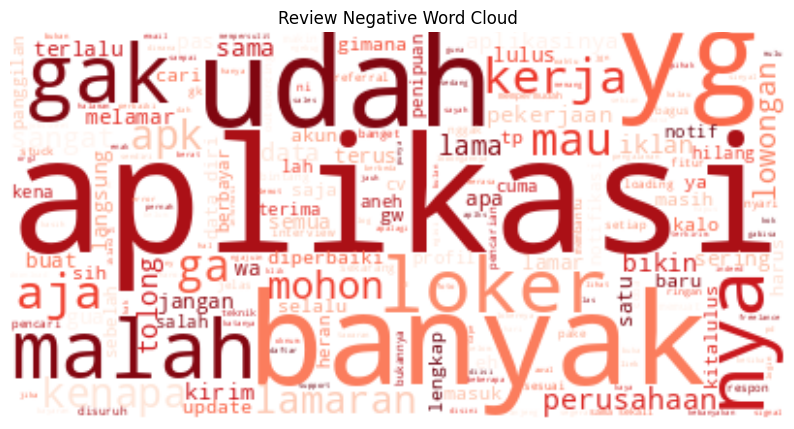

In [ ]:
# Generate and display word cloud for negative reviews
wordcloud_negative = WordCloud(stopwords=stopwords, max_font_size=100, margin=0, background_color="white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Review Negative Word Cloud")
plt.show()